<a href="https://colab.research.google.com/github/BDBandito/foreveryone1/blob/main/HA01_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
name = 'Oskar Andersson'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

U235_xs_nf = np.loadtxt('U235_xs_nf.csv', skiprows=3) # Use skiprows to skip,→header lines
U235_xs_cap = np.loadtxt('U235_xs_cap.csv', skiprows=3) # Add rows to also load the U238 data.

U238_xs_nf = np.loadtxt('U238_xs_nf.csv', skiprows=3)
U238_xs_cap = np.loadtxt('U238_xs_cap.csv', skiprows=3)

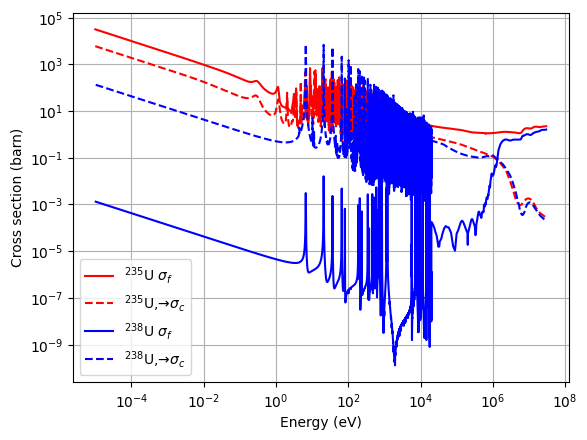

In [5]:
plt.loglog(U235_xs_nf[:,0],U235_xs_nf[:,1],'r-',label='$^{235}$U $\sigma_f$') #,→label set the label for the legend.

# Uncomment rows here to plot the other cross sections in the same plot
plt.loglog(U235_xs_cap[:,0],U235_xs_cap[:,1],'r--',label='$^{235}$U,→$\sigma_c$') # By students
plt.loglog(U238_xs_nf[:,0],U238_xs_nf[:,1],'b-',label='$^{238}$U $\sigma_f$') # By students
plt.loglog(U238_xs_cap[:,0],U238_xs_cap[:,1],'b--',label='$^{238}$U,→$\sigma_c$') # By students

plt.grid() # Adds grid lines
plt.legend() # Shows the legend
plt.xlabel('Energy (eV)') # Titel for the x-axis
plt.ylabel('Cross section (barn)') # Titel for the y-axis
plt.show()


In [33]:
# Create an array with 100.000 energypoints logarthimically spaced between 10^-5 and 10^7.
E = np.logspace(-5, 7, 100000)
# Do the interpolation
U235_nf = np.interp(E,U235_xs_nf[:,0],U235_xs_nf[:,1])
U235_cap = np.interp(E,U235_xs_cap[:,0],U235_xs_cap[:,1])
U238_nf = np.interp(E,U238_xs_nf[:,0],U238_xs_nf[:,1])
U238_cap = np.interp(E,U238_xs_cap[:,0],U238_xs_cap[:,1])
# Add rows here for the other data sets

27370.16938633564


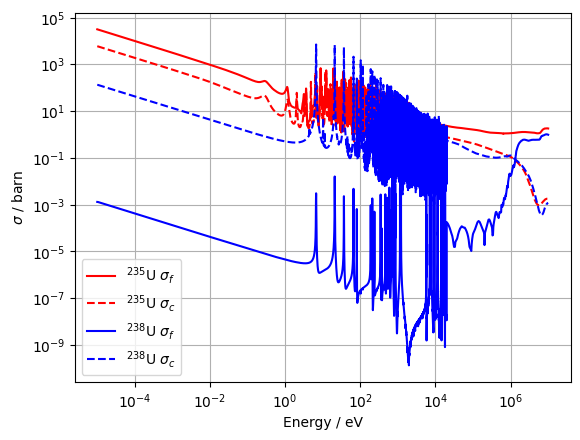

In [7]:
plt.loglog(E,U235_nf,'r-',label='$^{235}$U $\sigma_f$')
# Add rows here to plot the other cross sections in the same plot
plt.loglog(E,U235_cap,'r--',label='$^{235}$U $\sigma_c$') # By students
plt.loglog(E,U238_nf,'b-',label='$^{238}$U $\sigma_f$') # By students
plt.loglog(E,U238_cap,'b--',label='$^{238}$U $\sigma_c$') # By students
plt.grid()
plt.legend()
plt.xlabel('Energy / eV')
plt.ylabel('$\sigma$ / barn')
plt.show()

In [15]:
# Constants
rho_U = 19  # g/cm^3
N_A = 6.022*10**23  # atoms/mol

# Atomic masses (g/mol)
A_U238 = 238
A_U235 = 235

# Atomic number densities (N = rho * Na / A)
N_U238 = (rho_U * N_A) / A_U238  # atoms/cm^3
N_U235 = (rho_U * N_A) / A_U235  # atoms/cm^3

# Compute macroscopic cross-sections (Σ = N * σ)
Sigma_U235_nf = N_U235 * U235_nf * 1e-24  # cm^-1
Sigma_U235_cap = N_U235 * U235_cap * 1e-24  # cm^-1
Sigma_U238_nf = N_U238 * U238_nf * 1e-24  # cm^-1
Sigma_U238_cap = N_U238 * U238_cap * 1e-24  # cm^-1

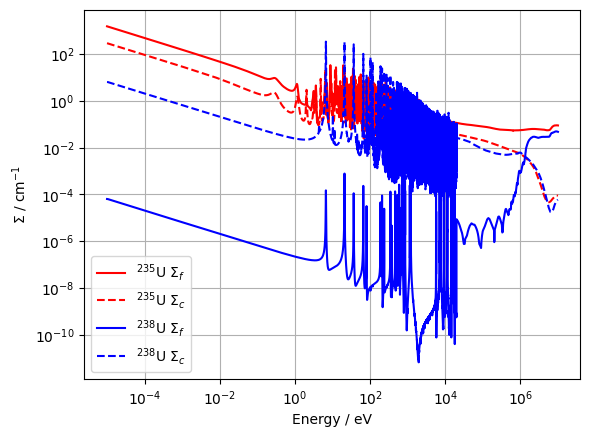

In [16]:
plt.loglog(E,Sigma_U235_nf,'r-',label='$^{235}$U $\Sigma_f$')
plt.loglog(E,Sigma_U235_cap,'r--',label='$^{235}$U $\Sigma_c$') # By students
plt.loglog(E,Sigma_U238_nf,'b-',label='$^{238}$U $\Sigma_f$') # By students
plt.loglog(E,Sigma_U238_cap,'b--',label='$^{238}$U $\Sigma_c$') # By students
plt.grid()
plt.legend()
plt.xlabel('Energy / eV')
plt.ylabel('$\Sigma$ / cm$^{-1}$')
plt.show()

In [17]:
U235_ABS = Sigma_U235_cap + Sigma_U235_nf
U238_ABS = Sigma_U238_cap + Sigma_U238_nf

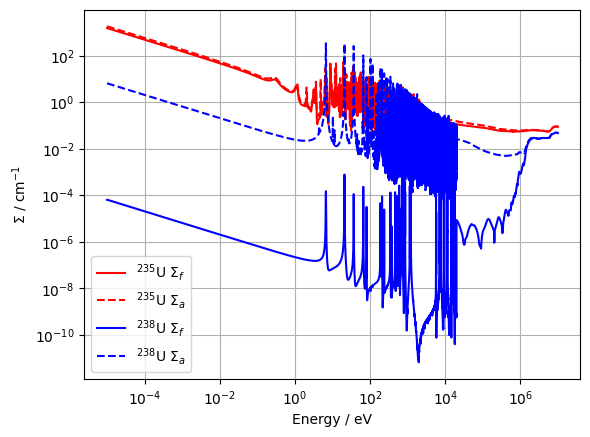

In [18]:
plt.loglog(E,Sigma_U235_nf,'r-',label='$^{235}$U $\Sigma_f$')
plt.loglog(E,U235_ABS,'r--',label='$^{235}$U $\Sigma_a$') # By students
plt.loglog(E,Sigma_U238_nf,'b-',label='$^{238}$U $\Sigma_f$') # By students
plt.loglog(E,U238_ABS,'b--',label='$^{238}$U $\Sigma_a$') # By students

plt.grid()
plt.legend()
plt.xlabel('Energy / eV')
plt.ylabel('$\Sigma$ / cm$^{-1}$')
plt.show()


In [25]:
e = 0.007 # enrichment

nat_NF = ((rho_U*N_A)/(e*N_U235+(1-e)*N_U238))*(U235_nf*e+(1-e)*U238_nf)
nat_CAP = ((rho_U*N_A)/(e*N_U235+(1-e)*N_U238))*(U235_cap*e+(1-e)*U238_cap)
nat_ABS = nat_NF + nat_CAP

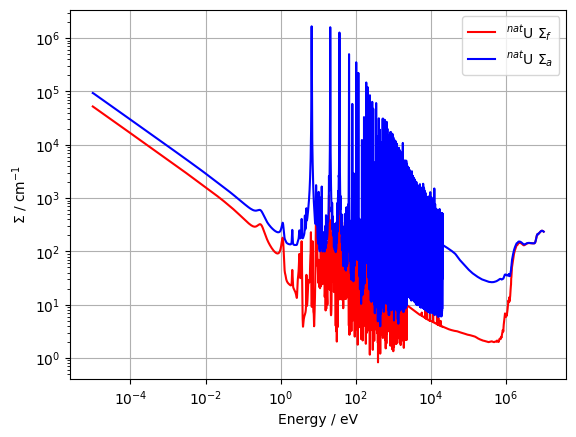

In [26]:
plt.loglog(E,nat_NF,'r-',label='$^{nat}$U $\Sigma_f$')
plt.loglog(E,nat_ABS,'b-',label='$^{nat}$U $\Sigma_a$') # By students

plt.grid()
plt.legend()
plt.xlabel('Energy / eV')
plt.ylabel('$\Sigma$ / cm$^{-1}$')
plt.show()

In [27]:
nubar = np.loadtxt('U5_U8_nubar.csv', skiprows=3) # Use skiprows to skip header,!lines
U235_nubar = np.interp(E,nubar[:,0],nubar[:,1])
U238_nubar = np.interp(E,nubar[:,0],nubar[:,2])

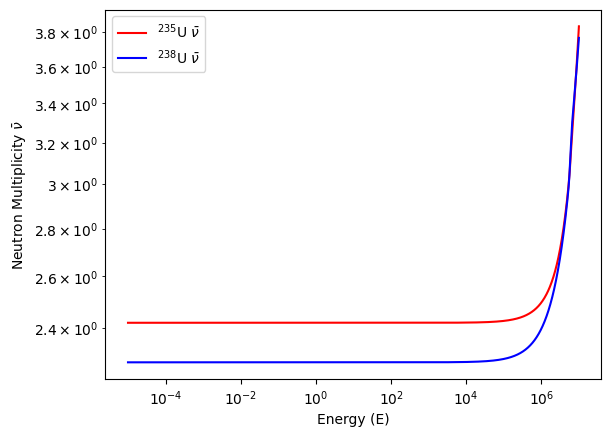

In [32]:
plt.loglog(E, U235_nubar, 'r-', label=r'$^{235}$U $\bar{\nu}$')  # Correct LaTeX for U-235
plt.loglog(E, U238_nubar, 'b-', label=r'$^{238}$U $\bar{\nu}$')  # Correct LaTeX for U-238

plt.xlabel("Energy (E)")
plt.ylabel(r"Neutron Multiplicity $\bar{\nu}$")  # Correct LaTeX format
plt.legend()
plt.show()


In [45]:
e1 = 0.007
e2 = 0.04
e3 = 0.1
eta1 = (U235_nubar * e1 + U238_nubar * (1-e1))*(nat_NF/nat_ABS)

eta2_NF = ((rho_U*N_A)/(e2*N_U235+(1-e2)*N_U238))*(U235_nf*e2+(1-e2)*U238_nf)
eta2_CAP = ((rho_U*N_A)/(e2*N_U235+(1-e2)*N_U238))*(U235_cap*e2+(1-e2)*U238_cap)
eta2_ABS = eta2_NF + eta2_CAP
eta2 = (U235_nubar * e2 + U238_nubar * (1-e2))*(eta2_NF/eta2_ABS)

eta3_NF = ((rho_U*N_A)/(e3*N_U235+(1-e3)*N_U238))*(U235_nf*e3+(1-e3)*U238_nf)
eta3_CAP = ((rho_U*N_A)/(e3*N_U235+(1-e3)*N_U238))*(U235_cap*e3+(1-e3)*U238_cap)
eta3_ABS = eta3_NF + eta3_CAP
eta3 = (U235_nubar * e3 + U238_nubar * (1-e3))*(eta3_NF/eta3_ABS)


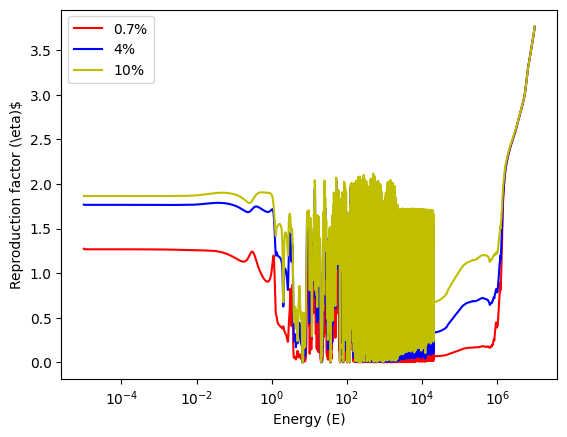

In [49]:
plt.semilogx(E, eta1, 'r-', label=r'$0.7\%$')
plt.semilogx(E, eta2, 'b-', label=r'$4\%$')
plt.semilogx(E, eta3, 'y-', label=r'$10\%$')


plt.xlabel("Energy (E)")
plt.ylabel(r"Reproduction factor (\eta)$")
plt.legend()
plt.show()